<a href="https://colab.research.google.com/github/safakatakancelik/rag-system-00-and-eval/blob/master/evaluation/EvaluationResultsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
results_df = pd.read_csv("https://raw.githubusercontent.com/safakatakancelik/rag-system-00-and-eval/refs/heads/master/evaluation/EvaluationResults.csv")

In [89]:
scores = results_df["scores"][0]
clean_scores_list = eval(scores, {"nan": np.nan, "null": None})
scores_df = pd.DataFrame(clean_scores_list)

In [90]:
scores_df

,faithfulness,answer_correctness,context_recall
0,0.000000,0.927835,1.0
1,0.666667,0.163005,1.0
2,0.000000,0.908406,1.0
3,1.000000,0.934265,1.0
4,1.000000,0.116770,0.0
...,...,...,...
95,0.000000,0.146093,1.0
96,1.000000,NaN,0.0
97,1.000000,0.892794,1.0
98,0.500000,0.106955,0.0


In [92]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   faithfulness        98 non-null     float64
 1   answer_correctness  94 non-null     float64
 2   context_recall      100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [96]:
scores_df.dropna(inplace=True)

In [98]:
scores_df.describe()

,faithfulness,answer_correctness,context_recall
count,92.000000,92.000000,92.000000
mean,0.785688,0.598250,0.736413
std,0.323118,0.316081,0.437532
min,0.000000,0.092725,0.000000
25%,0.625000,0.177713,0.187500
50%,1.000000,0.656508,1.000000
75%,1.000000,0.907829,1.000000
max,1.000000,0.960829,1.000000


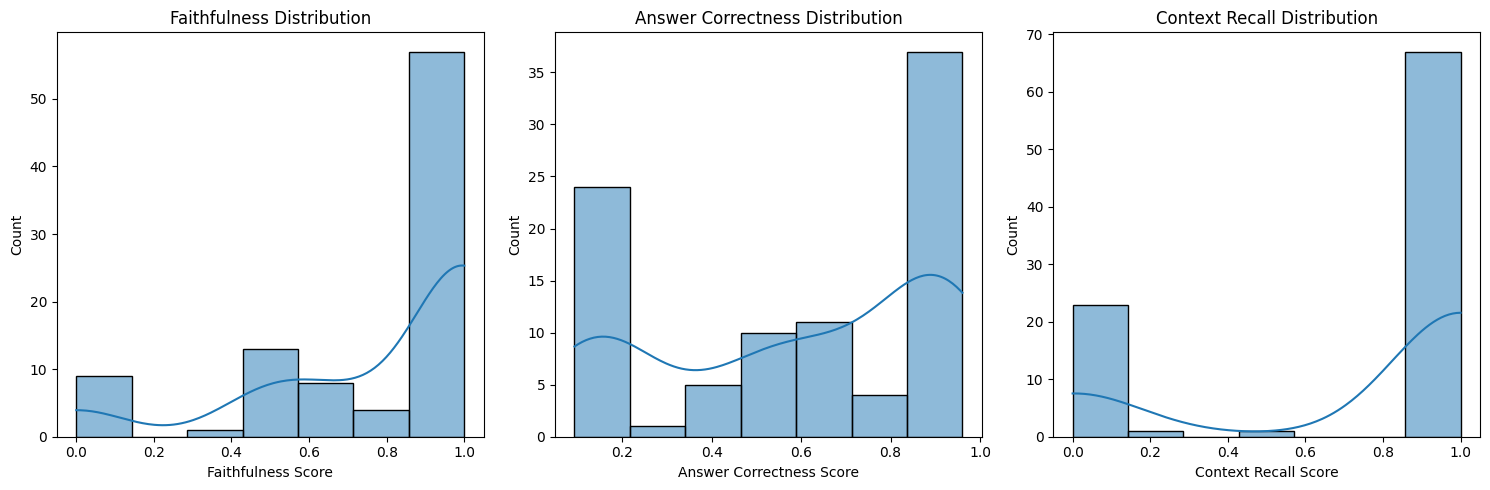

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(scores_df['faithfulness'], kde=True, ax=axes[0], bins=7)
axes[0].set_title('Faithfulness Distribution')
axes[0].set_xlabel('Faithfulness Score')

sns.histplot(scores_df['answer_correctness'], kde=True, ax=axes[1], bins=7)
axes[1].set_title('Answer Correctness Distribution')
axes[1].set_xlabel('Answer Correctness Score')

sns.histplot(scores_df['context_recall'], kde=True, ax=axes[2], bins=7)
axes[2].set_title('Context Recall Distribution')
axes[2].set_xlabel('Context Recall Score')

plt.tight_layout()
plt.show()

I can run separate tests isolating context recall.